In [2]:
%pylab inline --no-import-all
import numpy as np
import SCAW1
import SCAW2
import sample_gen as sg
import numpy.random as rn

Populating the interactive namespace from numpy and matplotlib


- The interval lengths of the true change pointes are distributed accoriding to the geometric dstribution with parameter 0.0017.
- We assume that data are distributed to one-variate Gaussian distribution. Parameters $(\mu, \sigma^2)$are sampled as follows. : First we sample $\sigma^2$ from inverse gamma distribution. Using this sample, we sample $\mu$ from gaussian distribution. 
\begin{align}
p(\mu,\sigma^2) &= p(\mu|\sigma^2)p(\sigma^2)\\
& = N\left(\mu;\mu_0, \frac{\sigma^2}{\gamma}\right)\cdot \Gamma^{-1}\left(\sigma^2;\frac{k}{2},\frac{\theta}{2}\right)\\
& = \left(\frac{1}{\sqrt{2\pi\frac{\sigma^2}{\gamma}}}\exp\left(-\frac{\gamma(\mu-\mu_0)^2}{2\sigma^2}\right)\right)\cdot\left((\sigma^2)^{-\frac{k}{2}-1}\frac{e^{-\frac{\theta}{2\sigma^2}}}{\Gamma(k)\theta^{-k}}\right).
\end{align}\\

3.5382982569


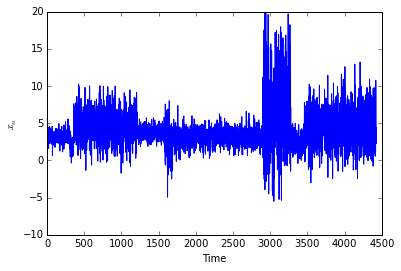

In [3]:
# generate a sample dataset
n, p, k, theta, gamma, mu_0 = 10, 0.0017, 2, 2, 1, 3
s = sg.gen_ab(n, p, k, theta, gamma, mu_0)
data = s[0]
t_true = s[1]
plt.plot(data)
plt.xlabel("Time")
plt.ylabel("$x_n$")
print(data[1])

In [ ]:
#SCAW1
ins = SCAW1.MDLCPStat_adwin(lossfunc=SCAW1.lnml_gaussian, how_to_drop = 'cutpoint')
size_scaw1 = ins.transform(X = data, d = 2, delta = 1)

In [4]:
# SCAW2
ins = SCAW2.MDLCPStat_adwin2(lossfunc=SCAW2.lnml_gaussian, how_to_drop = 'cutpoint')
size_scaw2 = ins.transform(X = data, d = 2, delta = 1, M=5)

In [ ]:
# show the plot of their window sizes 
f, a = plt.subplots(3, 1, figsize = (15, 15))
a[0].plot(data, label = 'data')
a[0].set_ylabel('Data')
a[0].vlines(t_true, ymin = min(data), ymax = max(data), colors = 'r')
a[0].legend(loc = 'best')
a[1].plot(size_pro2[0], label = 'SCAW1')
a[1].set_ylabel('Window size')
a[1].vlines(t_true, ymin = min(size_scaw1[0]), ymax = max(size_scaw1[0]), colors = 'r')
a[1].legend(loc = 'best')
a[2].plot(score_cf_, label = 'SCAW2')
a[2].set_ylabel('Window size')
a[2].vlines(t_true, ymin = min(size_scaw2[0]), ymax = max(size_scaw2[0]), colors = 'r')
a[2].legend(loc = 'best')